# 梯度下降算法

假设我们有一个线性回归模型 $f(\mathbf{X}; \mathbf{w}) = \mathbf{X}\mathbf{w}$ <br>

其中$\mathbf{X} \in \mathbb{R}^{m \times n}; \mathbf{y} \in \mathbb{R}^{m}$; $\mathbf{w}$是模型参数. <br>

注意$\mathbf{X} = (\underbrace{[1,...,1]^T}_{m} | \mathbf{X_{samples}} )$. 即我们的样本$\mathbf{X_{samples}} \in \mathbb{R}^{m \times (n-1)} $<br>

在训练过程中我们想要最小化这个损失函数:<br>



\begin{equation}
J(\mathbf{w}) = ||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2
\end{equation} <br>

在求 $argmin_{\mathbf(w)}J(\mathbf{w})$ 时我们可以利用其显式解: <br>

\begin{equation}
(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} = argmin_{\mathbf(w)}||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2
\end{equation} <br>

但在 $\mathbf{X}^T\mathbf{X}$ 是不可逆矩阵时该方法不适应, 即$\mathbf{X}^T\mathbf{X}$是奇异矩阵时 (iff $det \mathbf{X}^T\mathbf{X} = 0$). 我们可以考虑用梯度下降方法求该问题的数值解 (numerical solution).<br><br><br>


## 梯度下降方法基于以下的观察:

如果实值函数 $F({\mathbf{x}})$在点 $\mathbf{u}$ 处可微且有定义，那么函数 $F({\mathbf{x}})$在 $\mathbf{u}$ 点沿着梯度相反的方向 $ -\nabla F({\mathbf{u}})$ 下降最快.<br>


因而，如果 $ {\mathbf{u_{new}}}={\mathbf{u}}-\alpha \nabla F({\mathbf{u}})$ 对一个足够小的数值 $ \alpha >0$ 成立，那么 $F({\mathbf{u_{new}}}) \leq F({\mathbf{u}})$ .<br><br><br>


## 例子

令 $F(\mathbf{v}) = || \mathbf{v} ||^2_2$, $\mathbf{v} \in \mathbb{R}^m$, 由于 $|| \cdot ||^2_2$ 处处可微: <br>

\begin{align}
\nabla F(\mathbf{v}) & = \frac{\partial }{\partial \mathbf{v}} F(\mathbf{v}) = \Bigg[ \frac{\partial }{\partial \mathbf{v_1}} F(\mathbf{v}),  \frac{\partial }{\partial \mathbf{v_2}} F(\mathbf{v}), ..., \frac{\partial }{\partial \mathbf{v_n}} F(\mathbf{v})\Bigg]^T
\end{align}<br>

\begin{align}
\frac{\partial }{\partial \mathbf{v_i}} F(\mathbf{v}) & = \frac{\partial }{\partial \mathbf{v_i}} ||\mathbf{v}||^2_2 \\
& = \frac{\partial }{\partial \mathbf{v_i}} \sum_{k=1}^{m} \mathbf{v_k^2} \\
& = 0+0+...+2\mathbf{v_i}+0 \\
& = 2\mathbf{v_i}\\
\end{align} <br>

\begin{equation}
\nabla F(\mathbf{v}) = \frac{\partial }{\partial \mathbf{v}} F(\mathbf{v}) = 2\mathbf{v}
\end{equation}<br>

## 回到回归问题:

我们的损失函数 $J(\cdot)$ 只和模型参数 $\mathbf{w}$ 有关, 因为在计算损失时 $\mathbf{X}$ 和 $\mathbf{y}$是已知的, 我们需要通过调整$\mathbf{w}$ 来优化模型<br>

\begin{equation}
J(\mathbf{w}) = ||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2
\end{equation} <br>

我们可以考虑使用梯度下降法, $\alpha$ 是一个参数 <br>

\begin{equation}
\mathbf{w_{new}} = \mathbf{w_{old}} -\alpha \nabla J({\mathbf{w_{old}}})
\end{equation} <br>

其中 <br>

\begin{equation}
\nabla J(\mathbf{w}) = \Bigg[ \frac{\partial }{\partial \mathbf{w_1}} J(\mathbf{w}),  \frac{\partial }{\partial \mathbf{w_2}} J(\mathbf{w}), ..., \frac{\partial }{\partial \mathbf{w_n}} J(\mathbf{w}) \Bigg] ^ T
\end{equation}<br><br>


对于$\mathbf{w}$的每一个元素 <br>


\begin{align}
\frac{\partial }{\partial \mathbf{w_i}} J(\mathbf{w}) & = \frac{\partial }{\partial \mathbf{w_i}} ||\mathbf{X}\mathbf{w} - \mathbf{y}||^2_2  \\
& = \frac{\partial }{\partial \mathbf{w_i}}  F(G(\mathbf{w}))\\
& =  \frac{\partial }{\partial G} F(G(\mathbf{w})) \cdot  \frac{\partial }{\partial \mathbf{w_i}}  G(\mathbf{w}) \\
& \\
& = 2 G(\mathbf{w}) \cdot  \mathbf{X_{:,i}} \\
& \\
& = 2 (\mathbf{X}\mathbf{w} - \mathbf{y}) \cdot \mathbf{X_{:,i}} \\
& \\
& \\
 F(\mathbf{v}) &= ||\mathbf{v}||^2_2  \quad \frac{\partial }{\partial \mathbf{v}} F(\mathbf{v}) = 2\mathbf{v} \\
 G(\mathbf{w}) & = \mathbf{X}\mathbf{w} - \mathbf{y} \quad  \frac{\partial }{\partial \mathbf{w_i}} G(\mathbf{w}) = \mathbf{X_{:,i}}
& \\
& \\
\end{align} 
<br><br>

所以 <br>

\begin{equation}
\nabla J(\mathbf{w}) = 2 (\mathbf{X}\mathbf{w} - \mathbf{y}) \cdot  \mathbf{X}
\end{equation}<br><br>


那么模型中$\mathbf{w}$可以由梯度下降法搜索得到: ($\alpha$ 是一个参数) <br><br>

\begin{align}
\mathbf{w_{new}} & = \mathbf{w_{old}} - 2 \alpha (\mathbf{X}\mathbf{w_{old}} - \mathbf{y}) \cdot \mathbf{X} \\
&\\
& = \mathbf{w_{old}} - 2 \alpha (\mathbf{y_{(\text{predicted on }X)}} - \mathbf{y}) \cdot \mathbf{X}
\end{align} <br>


## 迭代计算

我们可以使用迭代的方式来计算梯度并更新 $\mathbf{w_{new}}$ 即:<br>
`
n_iters = 1000
w = [1,1,1]
for i in range(n_iters):
    w = w - 2 * alpha * gradient_of_J(w)
`

完成下面的 `gradient_descent`函数

In [22]:
import numpy as np
from sklearn.metrics import r2_score

class MyLinearRegression:
    def __init__(self):
        self.w = None

    @staticmethod
    def ones_augment_to_left(X):
        X = np.array(X)
        ones = np.ones(X.shape[0])
        return np.column_stack([ones, X])
    
    @staticmethod
    def gradient_descent(X, y, n_iters=10000, alpha=0.05, weight=None):
        w = weight
        if w is None:
            w = np.random.rand(X.shape[1])
            w = np.ones(X.shape[1])
        pass
        
        ###### write your code below ######
        for i in range(1, n_iters+1):
            y_pred = X.dot(w)
            loss = y_pred - y
            
            grad = loss.dot(X)/X.shape[0]
            w = w - alpha *  grad # update
            
            if i % (n_iters//10) == 0:
                print('iter:%d \ttraining MSE=%.3f \tMAE=%.3f \tr^2=%.3f'%(
                    i,
                    np.linalg.norm(loss),
                    np.linalg.norm(loss, ord=1),
                    r2_score(y, y_pred)
                    )
                )
                
        ###### write your code above ######
        
        return w
    
    @staticmethod
    def closed_form(X ,y):
        product = np.dot(X.T, X)
        theInverse = np.linalg.inv(product)
        return np.dot(np.dot(theInverse, X.T), y)
    
    
    def fit(self, X_train, y_train, method='closed form', **kwargs):
        X = self.ones_augment_to_left(X_train)
        y = np.array(y_train)
        
        if method=='closed form':
            self.w = self.closed_form(X ,y)
        elif method == 'gradient descent':
            self.w = self.gradient_descent(X, y, **kwargs)
        return self

    
    def predict(self, X_test):
        X_test = np.array(X_test)
        augX_test = self.ones_augment_to_left(X_test)
        return augX_test.dot(self.w)
    
# 测试
import numpy as np

mlr = MyLinearRegression()

X = np.array([[1, 5], [3, 2], [6, 1]])
y = np.array([2, 3, 4])
y_pred = mlr.fit(X, y, method='gradient descent', 
                 n_iters=10000, 
                 alpha=0.05).predict(X)
print('fitted w is \t', mlr.w)
print('expected w is \t [ 2.42857143  0.28571429 -0.14285714]')
print('Am I correct? \t', np.isclose(y, y_pred, atol=1e-2).all())
print('training MSE=%.2f MAE=%.2f r^2=%.4f'% (
        np.linalg.norm(y_pred - y),
        np.linalg.norm(y_pred - y, ord=1),
        r2_score(y_pred, y)
    ))

iter:1000 	training MSE=0.172 	MAE=0.267 	r^2=0.985
iter:2000 	training MSE=0.085 	MAE=0.131 	r^2=0.996
iter:3000 	training MSE=0.042 	MAE=0.065 	r^2=0.999
iter:4000 	training MSE=0.021 	MAE=0.032 	r^2=1.000
iter:5000 	training MSE=0.010 	MAE=0.016 	r^2=1.000
iter:6000 	training MSE=0.005 	MAE=0.008 	r^2=1.000
iter:7000 	training MSE=0.002 	MAE=0.004 	r^2=1.000
iter:8000 	training MSE=0.001 	MAE=0.002 	r^2=1.000
iter:9000 	training MSE=0.001 	MAE=0.001 	r^2=1.000
iter:10000 	training MSE=0.000 	MAE=0.000 	r^2=1.000
fitted w is 	 [ 2.42720014  0.28592049 -0.14260796]
expected w is 	 [ 2.42857143  0.28571429 -0.14285714]
Am I correct? 	 True
training MSE=0.00 MAE=0.00 r^2=1.0000


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets


from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.pyplot as plt

X = np.array([[1], [3], [6]])
y = np.array([2, 3, 4])

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

true_bias = 5
alpha = 0.02


X, y, true_coef = datasets.make_regression(n_samples=100, 
                       n_features=1, 
                       n_informative=1, 
                       bias=true_bias,
                       noise=5.0,
                       coef=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)


plt.close('all')

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(6,4.5), dpi=100)

    
line, = ax.plot([], [], 
            color='blue', 
            linewidth=3, label='Fitted Line')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    ax.scatter(X_train[:, 0], y_train, 
               color='purple', marker='^', 
               alpha=0.5, label='Train Data')
    
    ax.scatter(X_test[:, 0], y_test, 
               color='blue', 
               alpha=0.5, label='Test Data')
    ax.set_title('\n'.join(np.arange(5).astype(str)))
    fig.tight_layout()
    return (line,)


# animation function. This is called sequentially

last_weight = None

def animate(i):
    global last_weight
    n_iters = i
    mlr = MyLinearRegression()
    
    mlr.fit(X_train, y_train, 
            n_iters=1, 
            alpha=alpha, 
            method='gradient descent', 
            weight=last_weight)
    
    last_weight = mlr.w
    y_pred = mlr.predict(X_test)
    y_train_pred = mlr.predict(X_train)
    
    
    line.set_data(X_test[:, 0], y_pred)
    
    
    axtitle = []
    axtitle.append('n_iter=%s, alpha=%s' % (n_iters, alpha))
    axtitle.append('model w=%s \ntrue w=[%s, %s]' % (
        mlr.w, true_bias, true_coef))
    axtitle.append('training MSE=%.2f MAE=%.2f r^2=%.4f'% (
        np.linalg.norm(y_train - y_train_pred),
        np.linalg.norm(y_train - y_train_pred, ord=1),
        r2_score(y_train, y_train_pred)
    ))
    axtitle.append('testing MSE=%.2f MAE=%.2f r^2=%.4f' % (
            mean_squared_error(y_test, y_pred), 
            mean_absolute_error(y_test, y_pred), 
            r2_score(y_test, y_pred)))
    ax.set_title('\n'.join(axtitle))
    return (line,)



# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)

ax.legend()
HTML(anim.to_html5_video())

In [ ]:

fig = plt.figure(figsize=(5,15))
for i, n in enumerate([1, 100, 200, 500, 1000]):
    y_pred = MyLinearRegression().fit(
        X_train, y_train, n_iters=n, alpha=alpha, method='gradient descent').predict(
        X_test)
    ax = fig.add_subplot(5, 1, i+1)
    
    ax.set_xlabel('X[:, 0]')
    
    ax.set_ylabel('y')
    
    ax.scatter(X_train[:, 0], y_train, 
               color='purple', marker='^', 
               alpha=0.5, label='Train Data')
    
    ax.scatter(X_test[:, 0], y_test, 
               color='blue', 
               alpha=0.5, label='Test Data')
    
    ax.plot(X_test[:, 0], y_pred, 
            color='blue', 
            linewidth=3, label='Fitted Line')
    

    ax.legend()

fig.tight_layout()
plt.show()

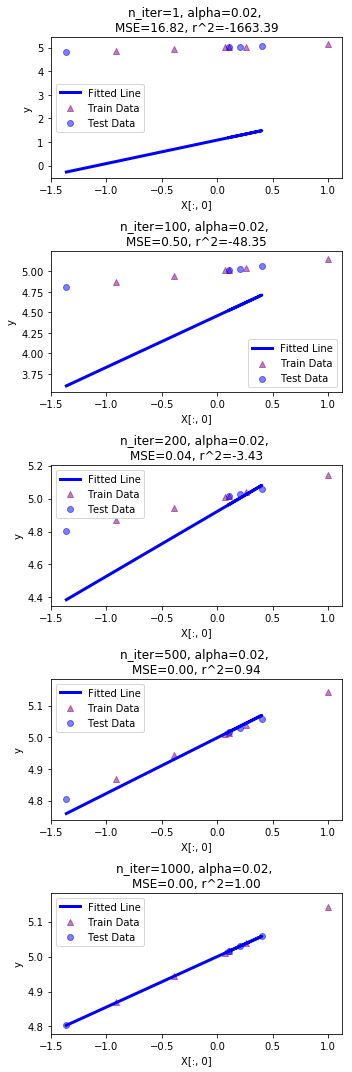

In [85]:
import matplotlib.pyplot as plt
X = np.array([[1], [3], [6]])
y = np.array([2, 3, 4])

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y, true_coef = make_regression(n_samples=10, 
                       n_features=1, 
                       n_informative=1, 
                       bias=5, 
                       coef=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

alpha = 0.02
fig = plt.figure(figsize=(5,15))
for i, n in enumerate([1, 100, 200, 500, 1000]):
    y_pred = MyLinearRegression().fit(
        X_train, y_train, n_iters=n, alpha=alpha, method='gradient descent').predict(
        X_test)
    ax = fig.add_subplot(5, 1, i+1)
    
    ax.set_xlabel('X[:, 0]')
    
    ax.set_ylabel('y')
    
    ax.scatter(X_train[:, 0], y_train, 
               color='purple', marker='^', 
               alpha=0.5, label='Train Data')
    
    ax.scatter(X_test[:, 0], y_test, 
               color='blue', 
               alpha=0.5, label='Test Data')
    
    ax.plot(X_test[:, 0], y_pred, 
            color='blue', 
            linewidth=3, label='Fitted Line')
    
    ax.set_title('n_iter=%s, alpha=%s, \nMSE=%.2f, r^2=%.2f'% (
                n, alpha,
                mean_squared_error(y_test, y_pred), 
                r2_score(y_test, y_pred)
                )
            )
    ax.legend()

fig.tight_layout()
plt.show()

In [25]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
# X, y, true_coef = datasets.make_regression(n_samples=1000000, 
#                        n_features=200, 
#                        n_informative=100, 
#                        bias=5, 
#                        coef=True)

diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [26]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
X[:, 0] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)
print(np.linalg.det(X_train.T.dot(X_train)))

0.0


In [27]:
import time
start_time = time.perf_counter()

mlr = MyLinearRegression()
alpha=0.5
n_iters=1000
mlr.fit(X_train, y_train, 
        n_iters=n_iters, alpha=alpha, 
        method='gradient descent')

y_pred = mlr.predict(X_test)

print('gradient descent, n_iter=%s, alpha=%s, \nMSE=%.2f, r^2=%.2f'% (
                n_iters, alpha,
                mean_squared_error(y_test, y_pred), 
                r2_score(y_test, y_pred)))

elapsed = time.perf_counter() - start_time
print('time elapsed %s seconds' % elapsed)

iter:100 	training MSE=1209.055 	MAE=17740.253 	r^2=0.179
iter:200 	training MSE=1131.156 	MAE=16639.119 	r^2=0.281
iter:300 	training MSE=1081.329 	MAE=15855.409 	r^2=0.343
iter:400 	training MSE=1048.170 	MAE=15288.207 	r^2=0.383
iter:500 	training MSE=1025.052 	MAE=14878.200 	r^2=0.410
iter:600 	training MSE=1008.186 	MAE=14581.509 	r^2=0.429
iter:700 	training MSE=995.396 	MAE=14354.164 	r^2=0.444
iter:800 	training MSE=985.405 	MAE=14172.103 	r^2=0.455
iter:900 	training MSE=977.428 	MAE=14032.683 	r^2=0.463
iter:1000 	training MSE=970.962 	MAE=13915.467 	r^2=0.471
gradient descent, n_iter=1000, alpha=0.4, 
MSE=2810.30, r^2=0.51
time elapsed 0.011028234846083507 seconds


In [28]:
import time
start_time = time.perf_counter()

mlr = MyLinearRegression()

mlr.fit(X_train, y_train, method='closed form')

y_pred = mlr.predict(X_test)

print('closed form solution \nMSE=%.2f, r^2=%.2f'% (
                mean_squared_error(y_test, y_pred), 
                r2_score(y_test, y_pred)))

elapsed = time.perf_counter() - start_time
print('time elapsed %s seconds' % elapsed)

LinAlgError: Singular matrix